In [1]:
import json

In [2]:
def json_reader(file):
    """
    Reads a json file and returns the data as a dictionary
    
    :param file: the file to be read
    :return: A dictionary
    """
    with open(file, 'r') as json_file:
        x = json.load(json_file)
    return x

salmon_n70 = json_reader('processed_data/salmon_barcode_counts_n70.json')
salmon_n71 = json_reader('processed_data/salmon_barcode_counts_n71.json')
salmon_n72 = json_reader('processed_data/salmon_barcode_counts_n72.json')

n70 = json_reader('processed_data/barcode_counts_n70.json')
n71 = json_reader('processed_data/barcode_counts_n71.json')
n72 = json_reader('processed_data/barcode_counts_n72.json')

In [8]:
def simple_similarity(first_file, second_file, threshold_value, threshold=True, represent=True):
    """
    The function takes two files and a threshold as input. 
    It returns the percentage of similarity between the two files
    
    :param first_file: The first file you want to compare
    :param second_file: the second file to compare to the first file
    :param threshold: The threshold for similarity
    :return: The similarity: %
    """

    def set_threshold():
        n = 0
        for  i in list(first_file.values()):
            if i >= threshold_value:
                n += 1
        return n

    if threshold:
        n = set_threshold()
    else:
        n = threshold_value
     
    first_n = list(first_file.keys())[:n]
    second_n = list(second_file.keys())[:n]

    count = 0
    for i in first_n:
        if i in second_n:
            count += 1

    percent = count / (len(first_n)) * 100

    if represent:
        return  'There are {a:d} barcodes greater than the threshold {b:d} and the similarty is {c:.2f}%'.format(a= n, b= threshold_value, c= percent)
    else:
        return percent

In [4]:
simple_similarity(n70, salmon_n70, 250)

'There are 3786 barocodes greater than the threshold 250 and the similarty is 96.80%'

In [5]:
simple_similarity(n71, salmon_n71, 50)

'There are 26 barocodes greater than the threshold 50 and the similarty is 100.00%'

In [6]:
simple_similarity(n72, salmon_n72, 250)

'There are 691 barocodes greater than the threshold 250 and the similarty is 97.97%'

In [74]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [79]:
similarity_n70 = []

for i in tqdm(range(1,270, 25)):
    similarity_n70.append(simple_similarity(n70, salmon_n70, i,threshold=True ,represent=False))

100%|██████████| 11/11 [00:04<00:00,  2.55it/s]


In [80]:
similarity_n71 = []

for i in tqdm(range(1,270, 25)):
    similarity_n71.append(simple_similarity(n71, salmon_n71, i,threshold=True ,represent=False))

100%|██████████| 11/11 [00:01<00:00,  8.84it/s]


In [81]:
similarity_n72 = []

for i in tqdm(range(1,270, 25)):
    similarity_n72.append(simple_similarity(n72, salmon_n72, i,threshold=True ,represent=False))

100%|██████████| 11/11 [00:01<00:00,  8.18it/s]


In [111]:
plt.style.use('ggplot')

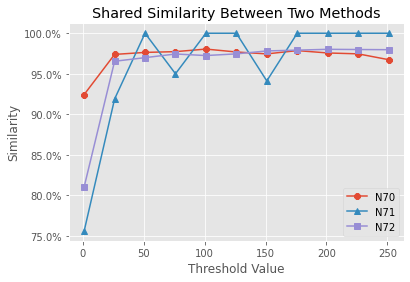

In [112]:
plt.plot(list(range(1,270, 25)), similarity_n70, label = 'N70', marker ='8' )
plt.plot(list(range(1,270, 25)), similarity_n71, label = 'N71', marker ='^' )
plt.plot(list(range(1,270, 25)), similarity_n72, label = 'N72', marker ='s')
plt.title('Shared Similarity Between Two Methods')
plt.ylabel('Similarity')
plt.xlabel('Threshold Value')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.1f}%'.format))
plt.legend()
plt.show()
